In [39]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

taxonomy_dict = {"s": "species", "g": "genus", "f": "family", "o": "order", "c": "class", "p": "phylum", "k": "kingdom"}

In [41]:
data_path = "/Volumes/TBHD_share/valencia/bmock12/NEPHELE/bio/outputs/metaphlan/merged/species_abundance.txt"
# data_path = "pipelines/bmock12/biobakery4/species_relab.txt"
data = pd.read_csv(data_path, sep="\t", index_col=0, header=0, names=["taxonomy", "relative_abundance"])
display(data.head())

,taxonomy,ids,relative_abundance
k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhizobiales|f__Cohaesibacteraceae|g__Cohaesibacter|s__Cohaesibacter_sp_ES_047,2|1224|28211|356|655351|655352|1798205,19.36211,NaN
k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhodobacterales|f__Rhodobacteraceae|g__Thioclava|s__Thioclava_sediminum,2|1224|28211|204455|31989|285107|1915319,2.05531,k__Bacteria|p__Proteobacteria|c__Alphaproteoba...
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Micromonosporales|f__Micromonosporaceae|g__Micromonospora|s__Micromonospora_echinofusca,2|201174|1760|85008|28056|1873|47858,2.01187,k__Bacteria|p__Actinobacteria|c__Actinobacteri...
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Micromonosporales|f__Micromonosporaceae|g__Micromonospora|s__Micromonospora_echinaurantiaca,2|201174|1760|85008|28056|1873|47857,1.66240,k__Bacteria|p__Actinobacteria|c__Actinobacteri...
k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Muricauda|s__Muricauda_lutimaris,2|976|117743|200644|49546|111500|475082,0.53492,NaN


In [ ]:
# User can specify the taxonomic level to plot.
taxonomy_level = "s"
split_pattern = f"|{taxonomy_level}__"

# Split taxonomy string into list of taxonomy levels.
index = data.index.to_list()
index = [i.split(split_pattern)[-1] for i in index]

# Create new dataframe with taxonomy level as index.
data.index = index
data

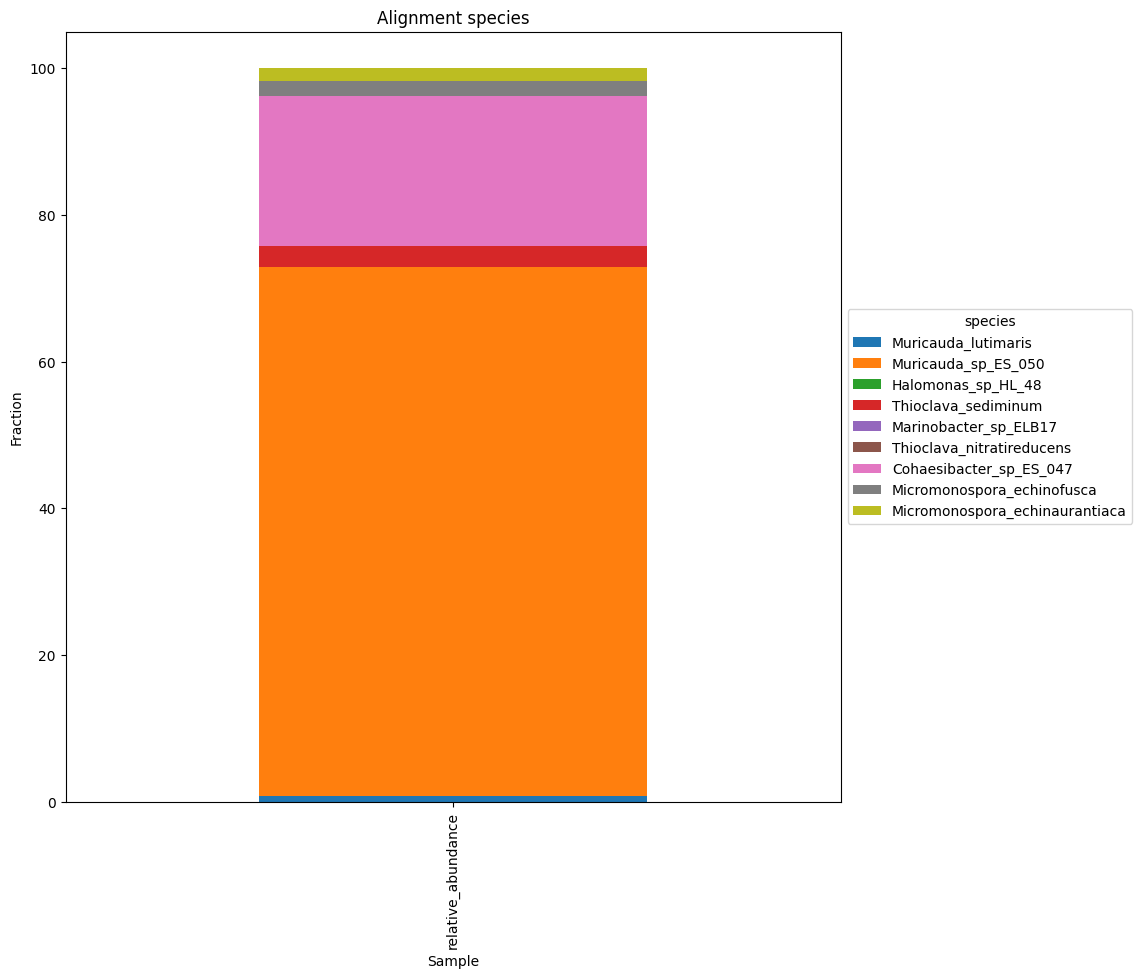

In [40]:
data.T.plot.bar(stacked=True, figsize=(10, 10), ylabel="Fraction", xlabel="Sample", title=f"Alignment {taxonomy_dict[taxonomy_level]}").legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title=f"{taxonomy_dict[taxonomy_level]}")

# Save figure.
output_path = os.path.join("pipelines/bmock12/biobakery3/", f"alignment_{taxonomy_dict[taxonomy_level]}")
plt.savefig(output_path + ".png", bbox_inches='tight')

data.to_csv(output_path + ".csv", index_label=f"{taxonomy_dict[taxonomy_level]}")

In [38]:
# We want a csv file with genus, relative abundance.
def clean_biobakery(df, rank="g"):
    indices = df.index.to_list()
    splitted = [i.split("|") for i in indices]
    # print(splitted)

    new_index = []
    for c, i in enumerate(splitted):
        for c2, j in enumerate(i):
            if j.startswith(f"{rank}__"):
                new_index.append(j.replace(f"{rank}__", ""))

    # df.index = new_index
    grouped = df.groupby(df.index).sum()

    # Divide the relative abundace by 100 to get a fraction.
    grouped["relative_abundance"] = grouped["relative_abundance"] / 100

    return grouped

clean_biobakery(data).to_csv("pipelines/bmock12/biobakery4/genus_relabund.csv", index_label="Genus")